In [110]:
import nengo
import multiprocessing
import numpy as np
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from hashids import Hashids
import cpg_search
reload(cpg_search)
import cpg_search.run_motif_search
reload(cpg_search.run_motif_search)
import cpg_search.utils
reload(cpg_search.utils)
import cpg_search.plotting
reload(cpg_search.plotting)
from cpg_search.run_motif_search import *
from cpg_search.utils import *
from cpg_search.plotting import *
import os
import scipy
from tqdm import tqdm
import itertools
import networkx as nx

In [527]:
from cpg_control.controllers.cpg import create_cpg_model
mn = MotorNode(4)
mn.l = slice(4,None)
mn.r = slice(0,4)
model = create_cpg_model(4,None,mn)
with nengo.Simulator(model) as sim:
    sim.run(6)


[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

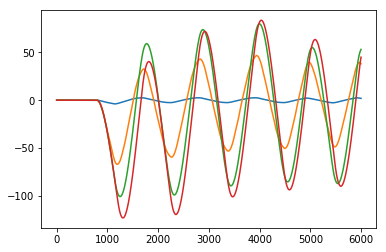

In [528]:
plt.plot(mn.rets[1:])

In [564]:
# Test with leech heartbeat matrix
modules=1
mm = np.array(
[
    [0,0,0,1],
    [1,0,0,0],
    [0,1,0,1],
    [0,0,1,0]
])*100
lr = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,1,0],
    [0,0,0,0]
])*100
imm = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]
)*-20
defaults = dict(
    
    gain=nengo.dists.Uniform(5,5),
    bias=nengo.dists.Uniform(0,0),
)
model,mn,probes = generate_nengo_model(mm,lr, imm, modules=4,defaults=defaults,motor_filter=nengo.Triangle(0.5))
with model:
    for ens in model.ens:
        ns = ens.neurons

        imp = nengo.Node(output=np.ones(1))
        nengo.Connection(imp[0],ns[0])

        nengo.Connection(imp[0],ns[4])
    


In [565]:
ret = run_model(model,mn,probes,metadata=[mm,lr])

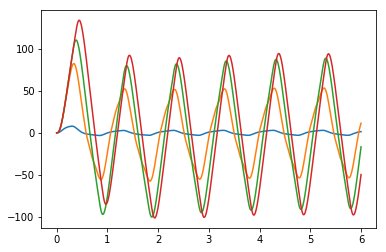

In [566]:
fig, ax = plt.subplots()
ax.plot(ret['time'], np.array(ret['motor_values'])[1:,:])


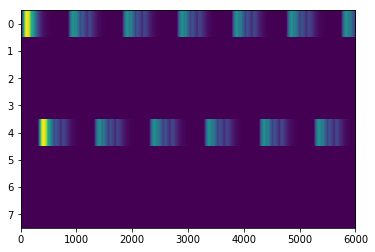

In [567]:
fig, ax = plt.subplots()
ax.imshow(ret['spikes'][0].T, aspect='auto')

In [3]:
# Values from s=6
np.array([[0.000604, -0.000001, -0.000002],
[ -0.000001, 0.000612, 0.000001 ],
[ -0.000002, 0.000001, 0.000494 ]])/(6**5)/0.000143

array([[ 5.43181099e-04, -8.99306455e-07, -1.79861291e-06],
       [-8.99306455e-07,  5.50375550e-04,  8.99306455e-07],
       [-1.79861291e-06,  8.99306455e-07,  4.44257389e-04]])

In [29]:
s = """| 776.801880 -1.773705 -2.794184 |
| -1.773705 787.608704 0.595665 |
| -2.794184 0.595665 634.684448 |"""

com="""-0.007396 0.020032 2.737918"""
m = 0.07

s = s.replace("|","")
s = s.replace(" \n","")
s = s.strip()
I = np.array(s.split(" "),dtype=np.float64).reshape((3,3))
sc = 100
I = I/(sc**5)*m
# I = np.array([[776.801880, -1.773705, -2.794184],
# [ -1.773705, 787.608704, 0.595665 ],
# [ -2.794184, 0.595665, 634.684448]])/(100**5)
print(I)
print("""
      <inertia
          ixx="{}"
          ixy="{}"
          ixz="{}"
          iyy="{}"
          iyz="{}"
          izz="{}" 
        />
      
      """.format(I[0,0],I[0,1],I[0,2],I[1,1],I[1,2],I[2,2]
))
com = np.array(com.split(" "), dtype=np.float64)/sc
print("""
    xyz="{} {} {}"
""".format(*com))

[[ 5.43761316e-09 -1.24159350e-11 -1.95592880e-11]
 [-1.24159350e-11  5.51326093e-09  4.16965500e-12]
 [-1.95592880e-11  4.16965500e-12  4.44279114e-09]]

      <inertia
          ixx="5.43761316e-09"
          ixy="-1.2415935e-11"
          ixz="-1.9559288e-11"
          iyy="5.513260928e-09"
          iyz="4.169655e-12"
          izz="4.442791136e-09" 
        />
      
      

    xyz="-7.396e-05 0.00020032 0.02737918"



In [18]:
s = """| 9590.694336 0.629671 135.391617 |
| 0.629671 9508.809570 -39.323833 |
| 135.391617 -39.323833 2543.475098 |"""

com="""-0.144827 -0.015218 9.289123"""

s = s.replace("|","")
s = s.replace(" \n","")
s = s.strip()
I = np.array(s.split(" "),dtype=np.float64).reshape((3,3))
sc = 100
I = I/(sc**5)
# I = np.array([[776.801880, -1.773705, -2.794184],
# [ -1.773705, 787.608704, 0.595665 ],
# [ -2.794184, 0.595665, 634.684448]])/(100**5)
print(I)
print("""
      <inertia
          ixx="{}"
          ixy="{}"
          ixz="{}"
          iyy="{}"
          iyz="{}"
          izz="{}" 
        />
      
      """.format(I[0,0],I[0,1],I[0,2],I[1,1],I[1,2],I[2,2]
))
com = np.array(com.split(" "), dtype=np.float64)/sc
print("""
    xyz="{} {} {}"
""".format(*com))

[[ 9.59069434e-07  6.29671000e-11  1.35391617e-08]
 [ 6.29671000e-11  9.50880957e-07 -3.93238330e-09]
 [ 1.35391617e-08 -3.93238330e-09  2.54347510e-07]]

      <inertia
          ixx="9.590694336e-07"
          ixy="6.29671e-11"
          ixz="1.35391617e-08"
          iyy="9.50880957e-07"
          iyz="-3.9323833e-09"
          izz="2.543475098e-07" 
        />
      
      

    xyz="-0.00144827 -0.00015218 0.09289123"



In [31]:
m = 0.07*2
r = 0.0323
l = 0.077
I = np.zeros((3,3))
I[0,0] = m*(3*r**2 + l**2)/12
I[1,1] = m*(3*r**2 + l**2)/12
I[2,2] = m*r**2/2
print(I)
print("""
      <inertia
          ixx="{}"
          ixy="{}"
          ixz="{}"
          iyy="{}"
          iyz="{}"
          izz="{}" 
        />
      
      """.format(I[0,0],I[0,1],I[0,2],I[1,1],I[1,2],I[2,2]
))

[[1.05686817e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05686817e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.30303000e-05]]

      <inertia
          ixx="0.000105686816667"
          ixy="0.0"
          ixz="0.0"
          iyy="0.000105686816667"
          iyz="0.0"
          izz="7.30303e-05" 
        />
      
      


In [32]:
m = 0.116*2
r = 0.0323
l = 0.17
I = np.zeros((3,3))
I[0,0] = m*(3*r**2 + l**2)/12
I[1,1] = m*(3*r**2 + l**2)/12
I[2,2] = m*r**2/2
print(I)
print("""
      <inertia
          ixx="{}"
          ixy="{}"
          ixz="{}"
          iyy="{}"
          iyz="{}"
          izz="{}" 
        />
      
      """.format(I[0,0],I[0,1],I[0,2],I[1,1],I[1,2],I[2,2]
))

[[0.00061924 0.         0.        ]
 [0.         0.00061924 0.        ]
 [0.         0.         0.00012102]]

      <inertia
          ixx="0.000619244153333"
          ixy="0.0"
          ixz="0.0"
          iyy="0.000619244153333"
          iyz="0.0"
          izz="0.00012102164" 
        />
      
      


In [112]:
saved_state = None
saved_mn_state = None

In [172]:
reload(run_motif_search)
from run_motif_search import *
with open('/home/raph/cpg_search/top_preformer_041221_210202.pkl') as fp:
    metadata = pickle.load(fp)

mm,lr,imm = metadata[0]
imm = imm*0.5
lr = lr*0.5
print(imm)
print(mm)
print(lr)
N = 12
print(len(model.ens))
# with model:
#     input_n = nengo.Node(size_out=8,output=lambda t: -np.ones(8)*0.1 if t > 6 else 0)
# #     input_n = nengo.Node(size_out=12,output=lambda t: -np.ones(12)*0.1 if t > 6 else 0)

#     for i,ens in enumerate(model.ens):
#         nengo.Connection(input_n, ens.neurons, synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[0], synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[4], synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[0], synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[2], synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[4], synapse=None)
# #         nengo.Connection(input_n[i], ens.neurons[6], synapse=None)

[[0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
[[0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [1 1 0 0]]
[[0.5 0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
12


In [173]:
restricted = ['bias','in','out']
def save_state(sim,ens,mn):
    state = {'ens':[],'mn':mn.rets[-1]}
    for i,ens in enumerate(ens):
        estate = {}
        signal = sim.model.sig[ens.neurons]
        for sigkey in signal.keys():
            sigval = sim.signals[signal[sigkey]]
            estate[sigkey] = sigval.copy()
        state['ens'].append(estate)
    return state
def load_state(sim,ens,mn,state):
    mn.rets = [state['mn']]
    for i,ens in enumerate(ens):
        estate = state['ens'][i]
        signal = sim.model.sig[ens.neurons]
        for sigkey in signal.keys():
            val = estate[sigkey]
            if sigkey not in restricted:
                sim.signals[signal[sigkey]] = val
            


            
        

In [174]:
print(saved_state['ens'][0].keys())

['adaptation', 'bias', 'voltage', 'refractory_time', 'in', 'out']


In [159]:
model,mn1, probes1 = generate_nengo_model(mm,lr,imm, modules=N,generate_probes=True)
with nengo.Simulator(model, seed=0) as sim:
    
    for i,ens in enumerate(model.ens):
        signal = sim.model.sig[ens.neurons]
        sim.signals[signal['voltage']][:4] = np.ones(4)
        if i == 0:
            break
    
    sim.run(2)
spike1 = [sim.data[probes1[i]['spikes']] for i in range(len(probes1))]
model,mn2, probes2 = generate_nengo_model(mm,lr,imm, modules=N,generate_probes=True)
with nengo.Simulator(model, seed=0) as sim:
    
    for i,ens in enumerate(model.ens):
        signal = sim.model.sig[ens.neurons]
        sim.signals[signal['voltage']][:4] = np.ones(4)
        if i == 0:
            break
    
    sim.run(1)
    
    saved_state = save_state(sim,model.ens,mn2)
spike2 = [sim.data[probes2[i]['spikes']] for i in range(len(probes2))]
model,mn3, probes3 = generate_nengo_model(mm,lr,imm, modules=N,generate_probes=True)
with nengo.Simulator(model, seed=0) as sim:
    
    load_state(sim,model.ens,mn3,saved_state)
    
    sim.run(1)
spike3 = [sim.data[probes3[i]['spikes']] for i in range(len(probes3))]

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

[-394.20923785 -232.28214902    4.         -157.95777426    3.96959761
  -61.86505952    4.         -232.28186597]
[   0.94182412  -85.94233824    3.96438431    3.99074584 -251.67690249
    3.99661631    3.94686764  -84.2491657 ]
[   3.98645338    3.27118402    3.99411277 -135.64481864  -52.32641526
  -48.72160572    3.99411277    3.39749336]
[ -48.72164013    3.94703872  -82.92353716    1.9811795     1.70296711
    2.69653538 -125.67467954    3.01979266]
[-170.31929189 -154.38438702   -1.28582367  -10.71471352    3.96953628
   -0.5961196    -7.76382152 -154.38441073]
[   1.92715473 -104.20034944    3.03436711    3.9895981  -506.87524831
    3.98033889   -0.78281291 -355.08878393]
[   3.97514048  -12.48987077    3.78453868 -260.5526599  -159.36548418
 -154.38436424    2.82057047    1.00661333]
[-225.55104052    3.98676828    3.99467304  -84.29217927    3.31474125
  -18.88596535    3.84038222    3.99987176]
[   0.592024    -94.80806981  -92.06497133    3.98225558 -102.16823347
    3.981

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

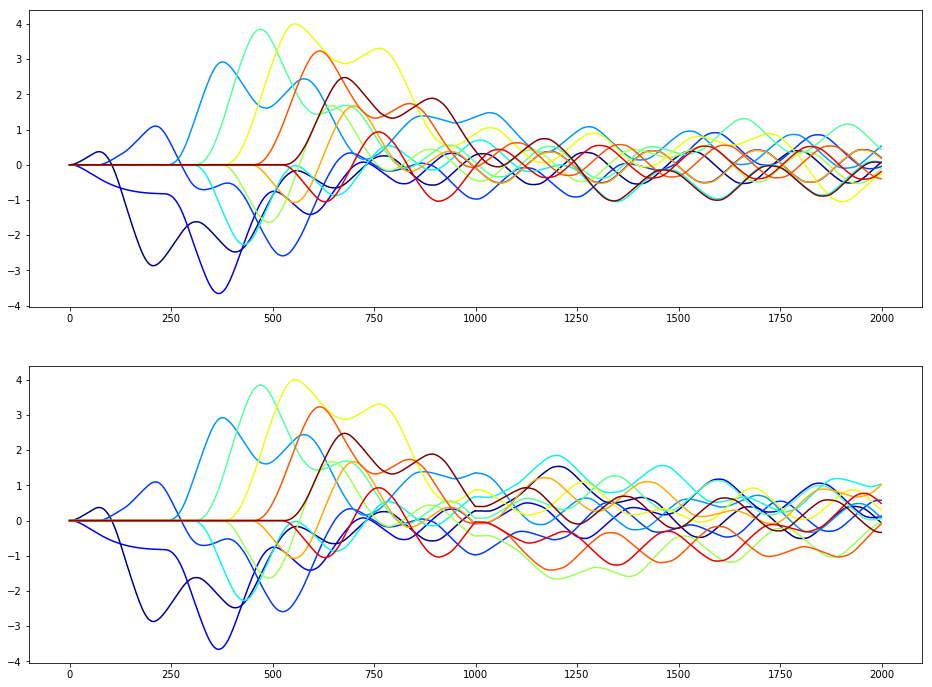

In [160]:
fig, axs = plt.subplots(2,1,figsize=(16,12))
colors = plt.cm.jet(np.linspace(0,1,N))
out = np.array(mn1.rets[1:])
for i in it:
    ls.append(axs[0].plot(out[tslc,i],color=colors[i])[0])

out = np.array(mn2.rets[1:])
for i in it:
    ls.append(axs[1].plot(range(0,1000),out[:,i],color=colors[i])[0])
out = np.array(mn3.rets[1:])
for i in it:
    ls.append(axs[1].plot(range(1000,2000),out[:,i],color=colors[i])[0])



(2000, 8)


(0, 2000)

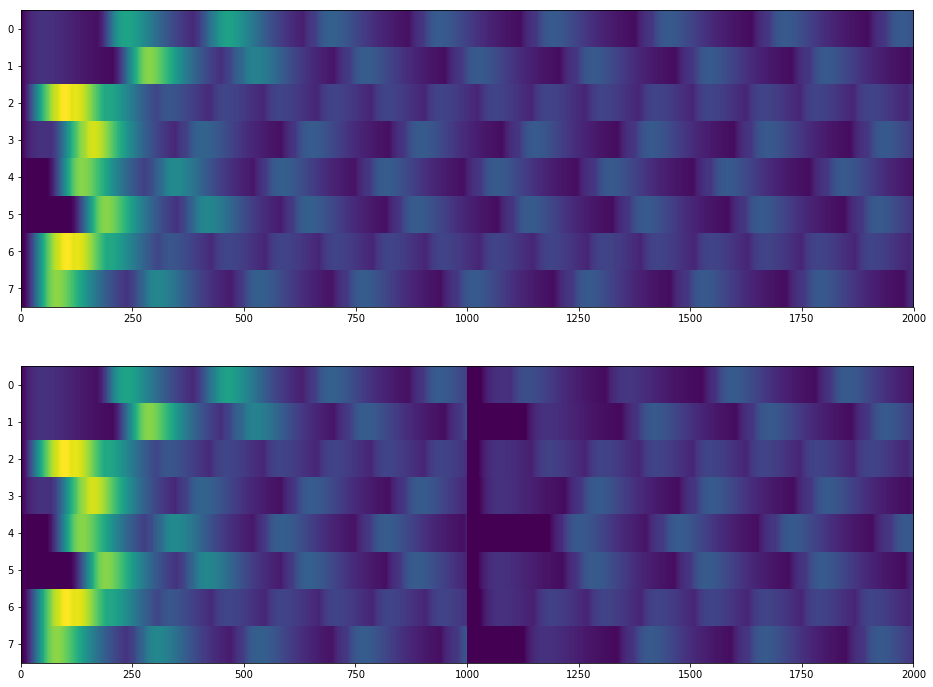

In [167]:
fig,axs = plt.subplots(2,1,figsize=(16,12))
print(spike1[0].shape)
axs[0].imshow(spike1[0].T, aspect='auto')
axs[1].imshow(np.hstack((spike2[0].T,spike3[0].T)), aspect='auto')
axs[1].set_xlim(0,2000)
# axs[2].imshow(probes3[0]['spikes'])

In [642]:
import cpg_search
import cpg_search.run_motif_search
reload(cpg_search.run_motif_search)
from cpg_search.run_motif_search import *
with open('/home/raph/cpg_search/top_preformer_041221_210202.pkl') as fp:
    metadata = pickle.load(fp)

mm,lr,imm = metadata[0]
imm = imm*0.2
lr = lr
mm = mm
N = 6

In [379]:
model,mn1, probes1 = generate_nengo_model(mm,lr,imm, modules=N,generate_probes=True,crop=0.5)
idx = {}
for i,ens in enumerate(model.ens):
#     ens.bias = np.ones(8)*5
#     ens.gain = np.ones(8)*5
    
    idx[ens.neurons] = i 


In [369]:
j = 0
for i,conn in enumerate(model.connections):
    try:
        i_pre = idx[conn.pre]
        i_post = idx[conn.post]
        if i_pre < i_post:
            adj = np.eye(8)
            adj[:4,:4] = imm - imm*0.02*j
            adj[4:,4:] = imm - imm*0.02*j

            print(adj)
            conn.transform = -adj
            j += 1
    except KeyError:
        pass

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[0.98 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.98 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98]]
[[0.96 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.96 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.96 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.96 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.96 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.96]]
[[0.94 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   

In [380]:

with nengo.Simulator(model, seed=0,dt=0.002) as sim:
    
    for i,ens in enumerate(model.ens):
        signal = sim.model.sig[ens.neurons]
        sim.signals[signal['voltage']][:4] = np.ones(4)
#         if i == 0:
#             break
    
    sim.run(12)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

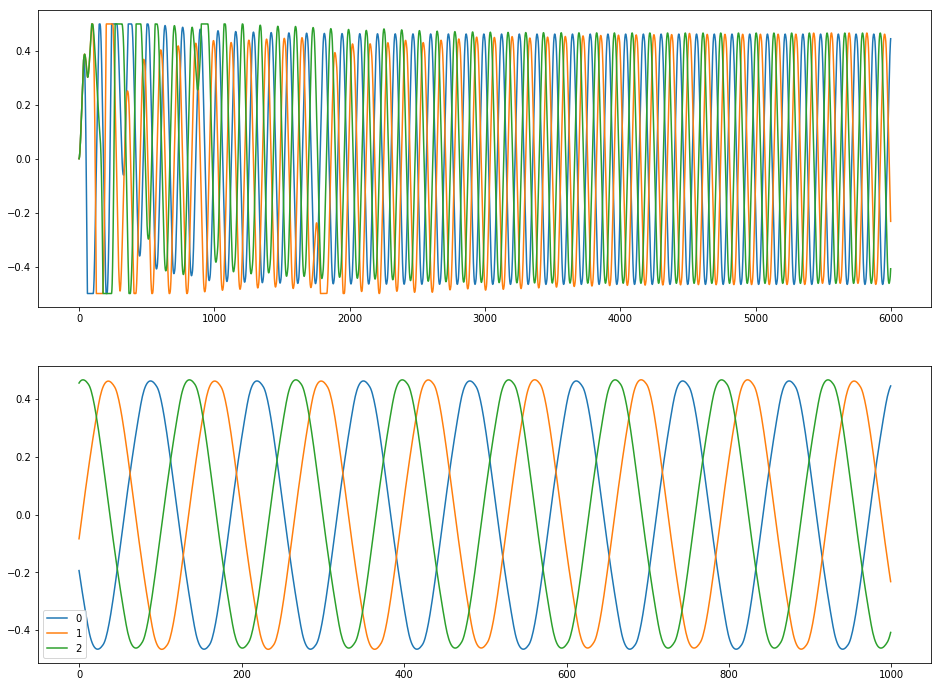

In [378]:
tslc = slice(-1000,None)
fig, axs = plt.subplots(2,1,figsize=(16,12))
colors = plt.cm.jet(np.linspace(0,1,N))
colors = plt.cm.tab20(np.linspace(0,1,N))
colors = ['tab:blue','tab:orange','tab:green']
out = np.array(mn1.rets[1:])
it = list(range(N))
it = [0,1,2]
ls = []
for i in it:
    ls.append(axs[0].plot(out[:,i],color=colors[i])[0])
    axs[0].
ls = []
for i in it:
    ls.append(axs[1].plot(out[tslc,i],color=colors[i])[0])
axs[1].legend(ls, it)


In [360]:
pz = None
for i in range(N):
    dat = out[tslc,i]
    zs = np.nonzero((dat > 0)[1:]&(dat < 0)[:-1])[0][:7]
    if pz is not None:
        d = (zs - pz) %131
        print(d)
    pz = zs
    print(zs, np.mean(zs[1:] - zs[:-1]))

(array([ 55, 186, 317, 448, 579, 710, 841]), 131.0)
[79 79 79 80 80 80 80]
(array([  3, 134, 265, 397, 528, 659, 790]), 131.16666666666666)
[100 100 100  99  99  99  99]
(array([103, 234, 365, 496, 627, 758, 889]), 131.0)
[90 90 90 90 90 90 90]
(array([ 62, 193, 324, 455, 586, 717, 848]), 131.0)
[105 105 105 105 105 105 105]
(array([ 36, 167, 298, 429, 560, 691, 822]), 131.0)


ValueError: operands could not be broadcast together with shapes (4,) (7,) 

Text(0,0.5,'Motor value')

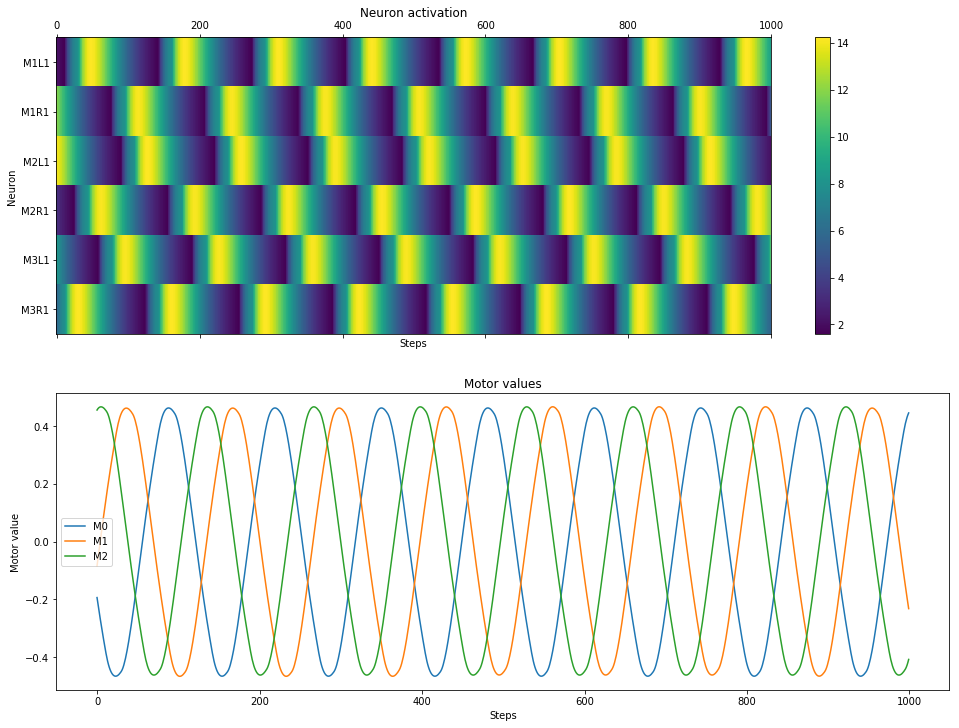

In [405]:
spike1 = [sim.data[probes1[i]['spikes']] for i in range(len(probes1))]
tslc = slice(-1000,None)
fig, axs = plt.subplots(2,1,figsize=(16,12))
colors = plt.cm.jet(np.linspace(0,1,N))
colors = plt.cm.tab20(np.linspace(0,1,N))
colors = ['tab:blue','tab:orange','tab:green']
out = np.array(mn1.rets[1:])
it = list(range(N))
it = [0,1,2]
ims = []
for i in it:
    ims.append(spike1[i][tslc,[0,4]])
im = axs[0].matshow(np.hstack(ims).T,aspect='auto')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Neuron')
axs[0].set_yticks(range(len(it)*2))
axs[0].title.set_text('Neuron activation')
plt.colorbar(im,ax=axs[0])
labels = ['M1L1', 'M1R1','M2L1','M2R1','M3L1','M3R1']

axs[0].set_yticklabels(labels)
ls = []
for i in it:
    ls.append(axs[1].plot(out[tslc,i],color=colors[i])[0])
axs[1].title.set_text('Motor values')
axs[1].legend(ls, ['M' + str(i) for i in it])
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Motor value')

(0, 8, 16)
(8, 16, 24)
(['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:green', 'tab:green', 'tab:green', 'tab:green', 'tab:green', 'tab:green'], {0: 'L1', 1: 'L2', 2: 'L3', 3: 'L4', 4: 'R1', 5: 'R2', 6: 'R3', 7: 'R4', 8: 'L1', 9: 'L2', 10: 'L3', 11: 'L4', 12: 'R1', 13: 'R2', 14: 'R3', 15: 'R4', 16: 'L1', 17: 'L2', 18: 'L3', 19: 'L4', 20: 'R1', 21: 'R2', 22: 'R3', 23: 'R4'}, array([[ -2. ,   1.5],
       [ -0.5,   0. ],
       [ -2.5,  -1. ],
       [ -1. ,  -2. ],
       [  2. ,   1.5],
       [  0.5,   0. ],
       [  2.5,  -1. ],
       [  1. ,  -2. ],
       [ -2. ,  -2.5],
       [ -0.5,  -4. ],
       [ -2.5,  -5. ],
       [ -1. ,  -6. ],
       [  2. ,  -2.5],
       [  0.5,  -4. ],
       [  2.5,  -5. ],
       [  1. ,  -6. ],
       [ -2. ,  -6.5],
       [ -0.5,  -8. ],
       [ -2.5,  

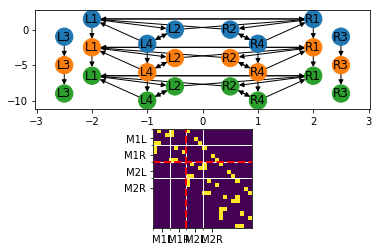

In [403]:
fig, ax = plt.subplots(2,1)
draw_graph((mm,lr,imm), modules=3,ax1=ax[0],ax2=ax[1],colors=colors)

In [1]:
import os
os.path.basename('./something/somethingelse/cfg.yaml')

'cfg.yaml'

oRcrfZc8c4cQcWcWfDcOcqcXc7f8fQcZcgfLc7cocYfpcVc8cRc1crcjcQc7c6cEc0cLcocjcwcBcMcXcZcRcncEc9cGcDcq


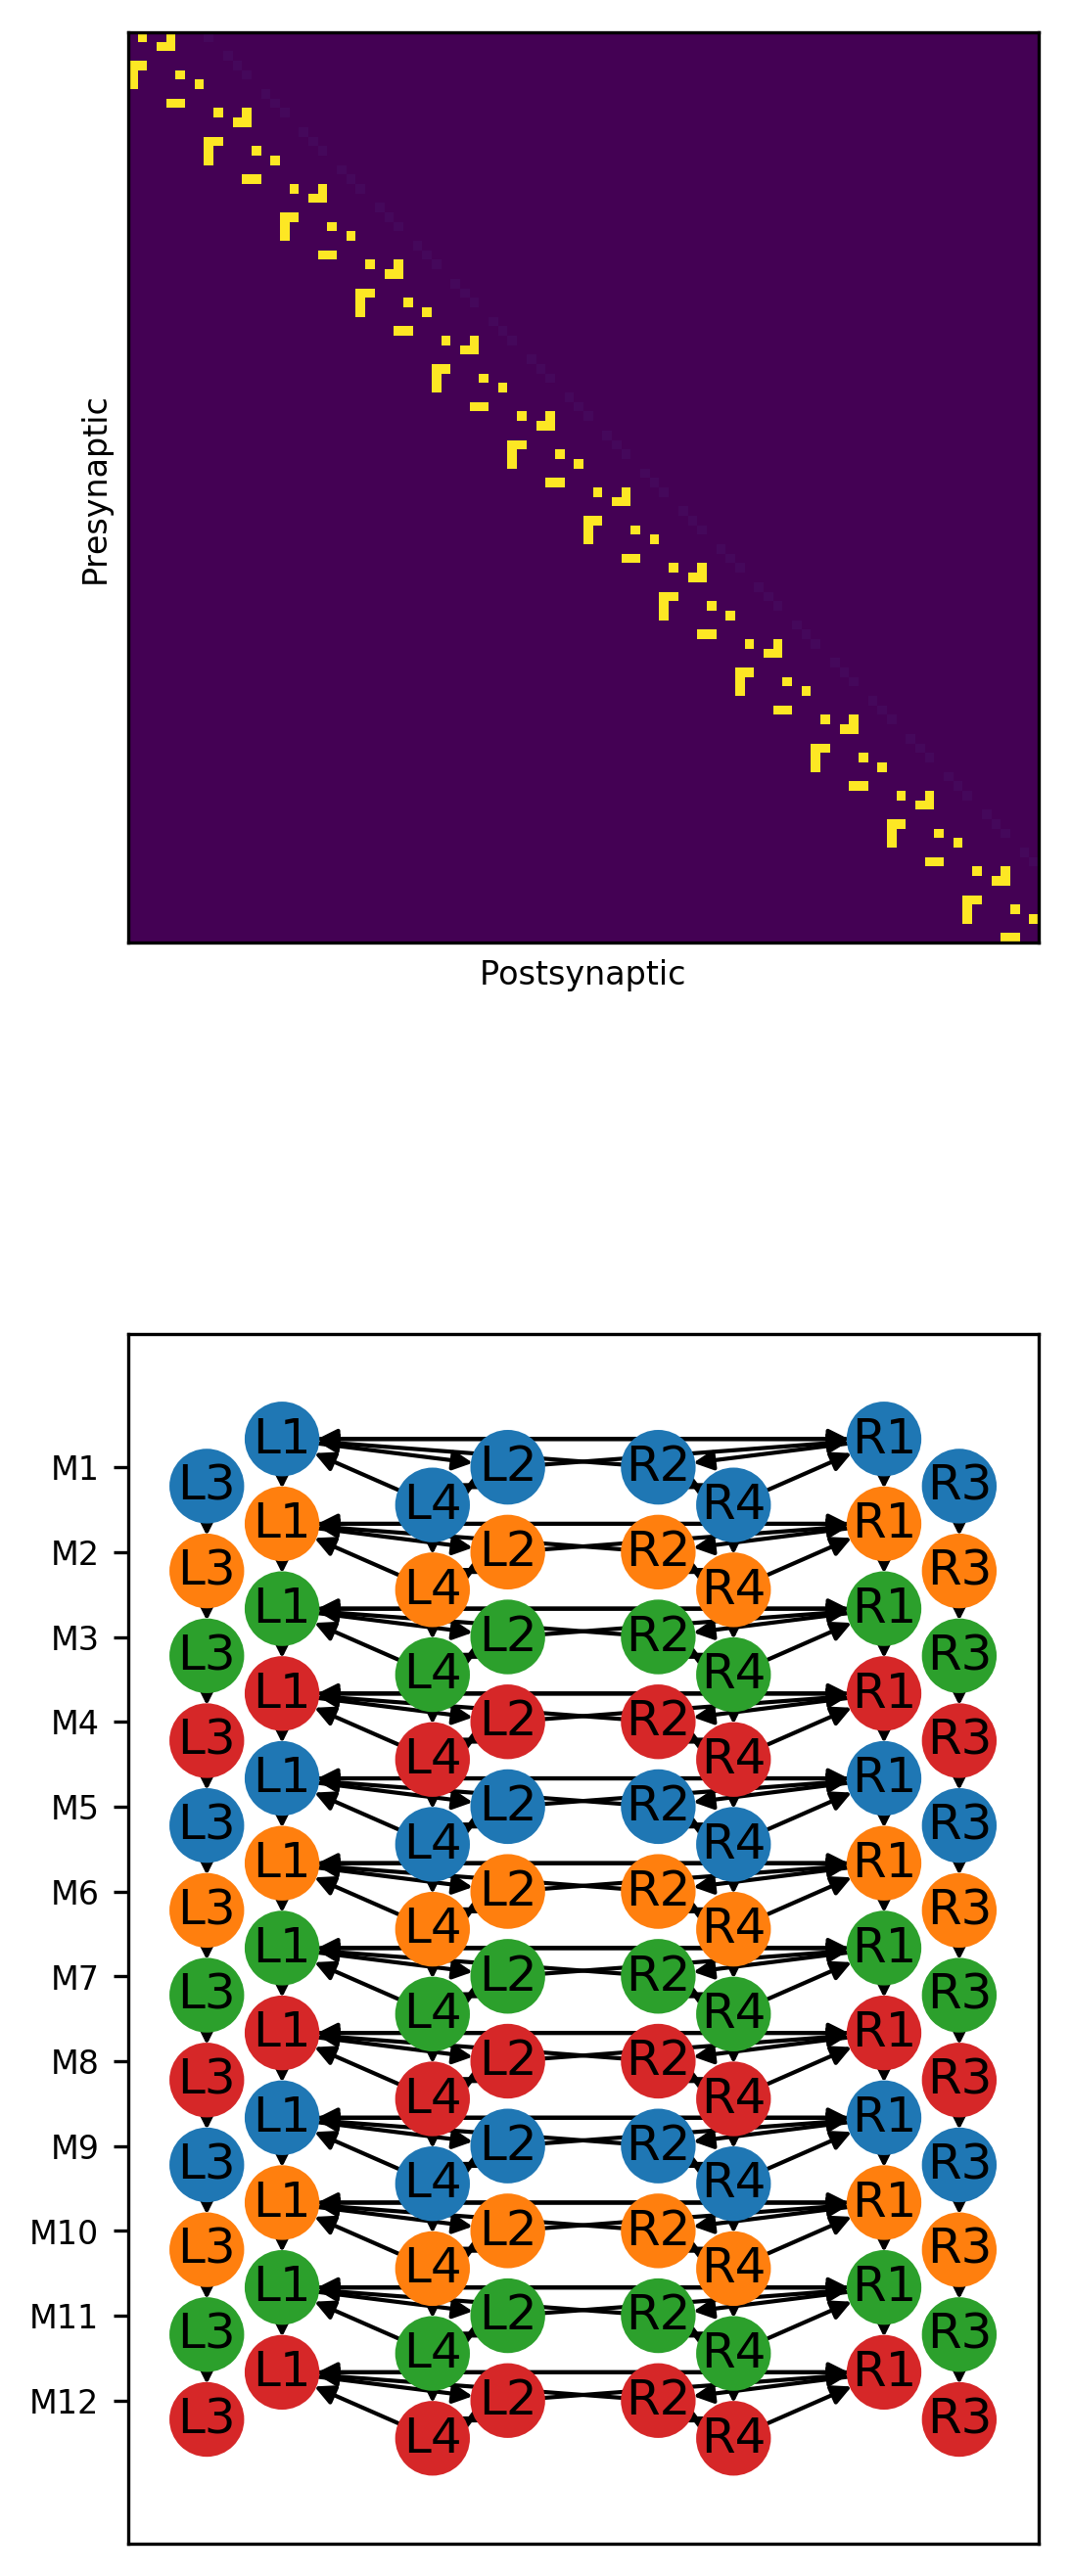

In [166]:
import cpg_search
import cpg_search.run_motif_search
reload(cpg_search.run_motif_search)
from cpg_search.run_motif_search import *
with open('/home/raph/cpg_search/top_preformer_041221_210202.pkl') as fp:
    metadata = pickle.load(fp)

mm,lr,imm = metadata[0]
imm = imm*0.02
lr = lr
mm = mm


N = 12
defaults = dict(
    neuron_type=nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)
)
    

model,mn1, probes1 = generate_nengo_model(
    mm,
    lr,
    imm, 
    modules=N,
    generate_probes=True,
#     generate_probes=False,
    crop=None, 
    defaults=defaults,
    imm_synapse=nengo.Alpha(0.05),
    w_synapse=nengo.Alpha(0.02)
)
for ens in model.ens:
    if ens.label == "module_0":
                with model:
                    inp = nengo.Node(output=lambda t: -0.1 if t > 4.5 else 0)
                    nengo.Connection(inp, ens.neurons[0], synapse=None)
                    nengo.Connection(inp, ens.neurons[4], synapse=None)
# mn1.tau = 0.02
fig,ax = plt.subplots(2,1,figsize=(4,12))
adj = create_adj_matrix(mm,lr,imm,modules=N)
print(make_hash((mm,lr,imm)))
draw_adj(ax[0],adj)

draw_graph(ax[1],adj, modules=N,colors=['tab:blue','tab:orange','tab:green','tab:red','tab:blue','tab:orange','tab:green','tab:red','tab:blue','tab:orange','tab:green','tab:red'])


In [167]:
labels = ['M1L1', 'M1R1','M2L1','M2R1','M3L1','M3R1','M4L1','M4R1']
labels = np.array(labels)

In [168]:
# mn1.l = slice(0,-2,2)
# mn1.r = slice(2,None,2)
# print(labels[mn1.l])
# print(labels[mn1.r])
# mn1.hs = 3
# mn1.rets = [np.zeros(3)]
# for node in model.all_nodes:
#     print(node)
#     node.size_out = 3
#     if node.label == "motor_node":
        
#         node.size_out = 3

In [169]:
with nengo.Simulator(model, seed=0,dt=0.003) as sim:
    
    for i,ens in enumerate(model.ens):
        signal = sim.model.sig[ens.neurons]
        sim.signals[signal['voltage']][:4] = np.ones(4)
#         if i == 0:
#             break
        
    sim.run(6)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

(2001, 12)


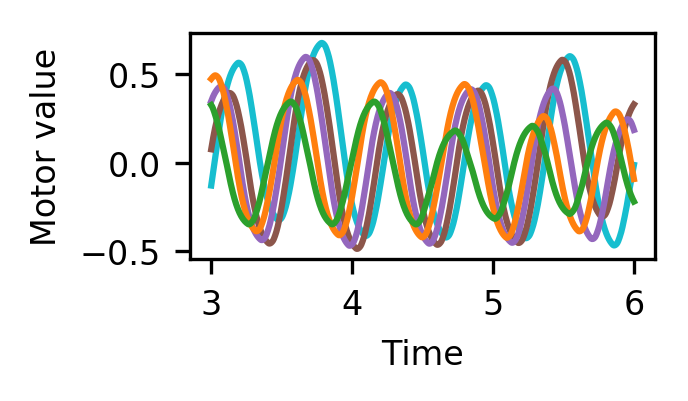

In [170]:
import matplotlib
matplotlib.rcParams["savefig.format"] = "pdf"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["font.size"] = 8
tslc = slice(-1000,None)
out = np.array(mn1.rets[1:])
fig,ax = plt.subplots(figsize=(2,1),dpi=300)
print(out.shape)
colors = ['tab:green', 'tab:orange','tab:purple','tab:brown','tab:cyan']
for i in np.arange(4,-1,-1):
    ax.plot(sim.trange()[tslc], out[tslc,i]/5,color=colors[i])
ax.set_xlabel('Time')
ax.set_ylabel('Motor value')
fig.savefig('./figures/2k.pdf')

(6, 1000)


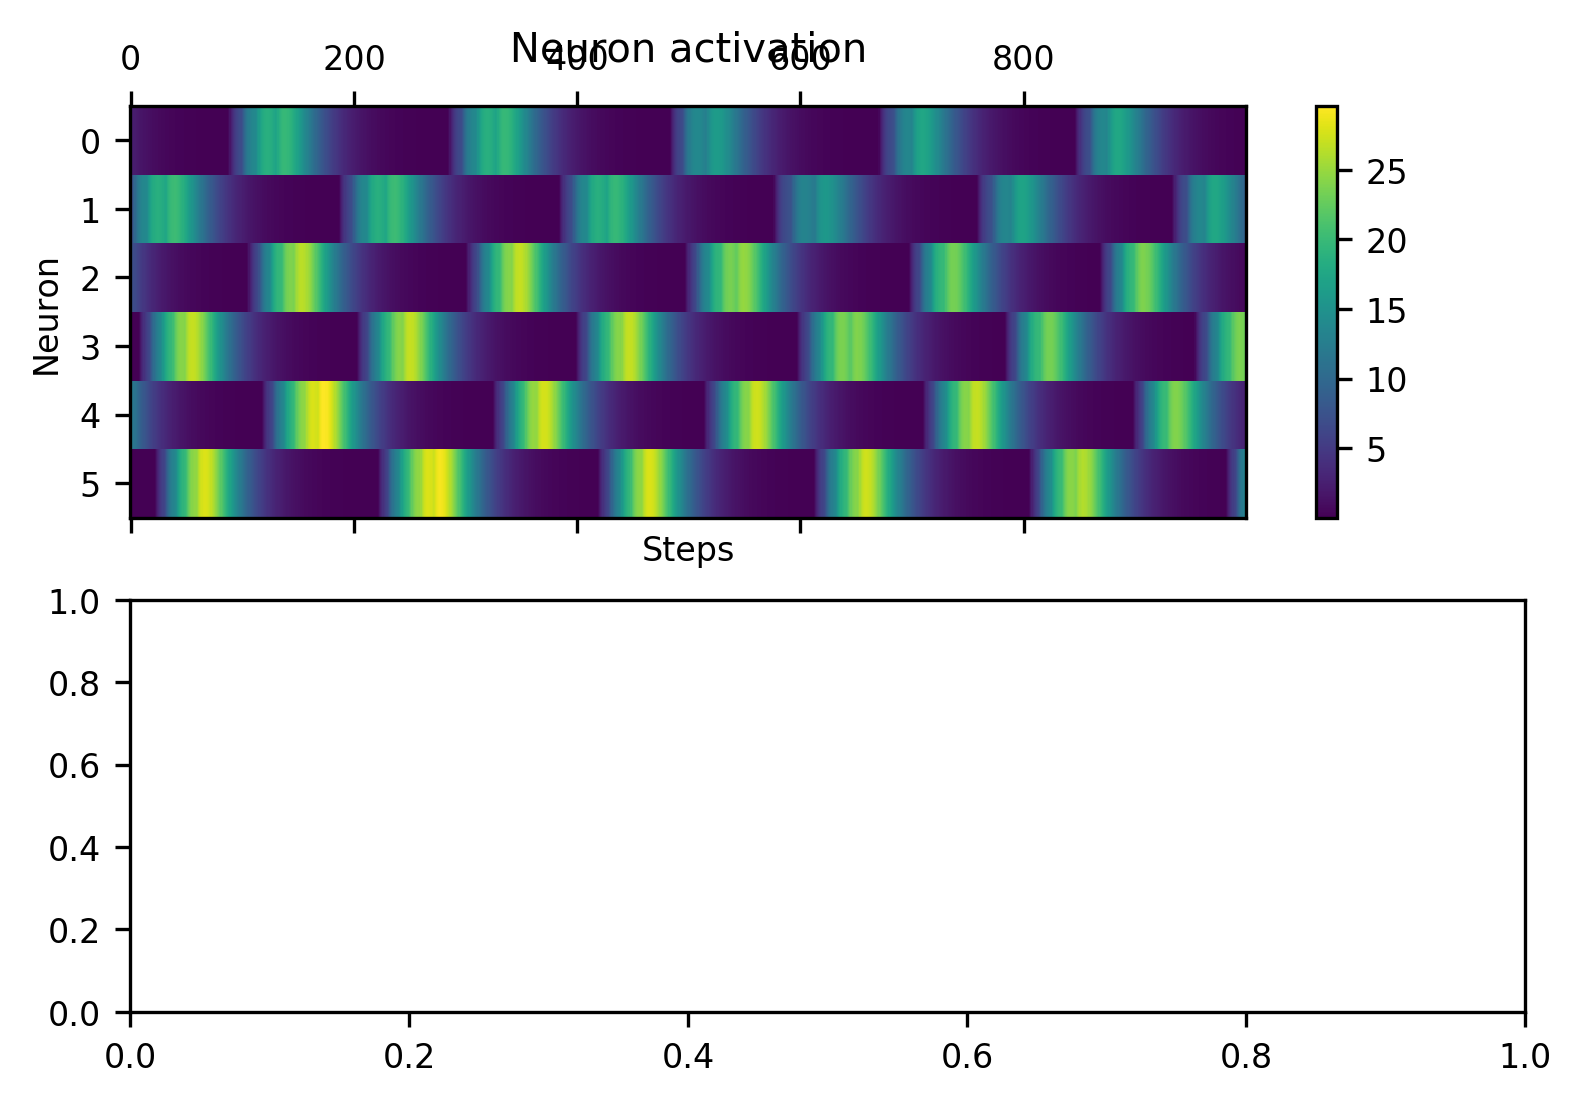

In [171]:
spike1 = [sim.data[probes1[i]['spikes']] for i in range(len(probes1))]

it = list(range(N))
it = [0,1,2]
ims = []
for i in it:
    ims.append(spike1[i][tslc,[0,4]])
fig,axs = plt.subplots(2,1)
ims = np.hstack(ims).T
print(ims.shape)
im = axs[0].matshow(ims,aspect='auto')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Neuron')
axs[0].set_yticks(range(len(it)*2))
axs[0].title.set_text('Neuron activation')
plt.colorbar(im,ax=axs[0])
labels = ['M1L1', 'M1R1','M2L1','M2R1','M3L1','M3R1']

In [142]:
defaults = dict(
    neuron_type="nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)"
)
config = dict(
    generate_nengo_model=dict(
        module_matrix=mm.tolist(),
        lr_matrix=lr.tolist(),
        intermodule_matrix=imm.tolist(),
        defaults=defaults,
        imm_synapse="nengo.Alpha(0.05)",
        w_synapse="nengo.Alpha(0.02)",
        modules=N
    )
)
import yaml
with open("top_performer_config.yaml",'w') as fp:
    yaml.dump(config,fp)

In [143]:
with open("top_performer_config.yaml") as fp:
    read_cfg = yaml.load(fp)
print(read_cfg)

{'generate_nengo_model': {'imm_synapse': 'nengo.Alpha(0.05)', 'defaults': {'neuron_type': 'nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)'}, 'lr_matrix': [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], 'intermodule_matrix': [[0.02, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.02, 0.0], [0.0, 0.0, 0.0, 0.02]], 'module_matrix': [[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0]], 'modules': 12, 'w_synapse': 'nengo.Alpha(0.02)'}}


[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0]]

In [174]:
class Test():
    def __init__(self, return_fn=None):
        if return_fn is None:
            return_fn = self._return_fn
        self.return_fn = return_fn
        self.i = 1
    def step(self, val):
        return self.return_fn(val)
    def _return_fn(self, val):
        return self.i + val
t = Test()
print(t.step(1))
t = Test(return_fn=lambda self, v: self.i+v)
print(t.step(1))

2


TypeError: <lambda>() takes exactly 2 arguments (1 given)